# Explore Facial Regonition Technology

Facial regonition lies at the foundation of a successfull X-Ray clone

In order to retrieve metadata about a person in frame, we need a way to match a given face with a database of faces 

In [1]:
import sys 

sys.path.append("/Users/srmarshall/Desktop/code/pbs/pbs-passthrough/")

In [3]:
from utils.facial_recognition import FacialRecognition

# instantaite facial recognition class 
facial_regonition = FacialRecognition()

## Proof of Concept

Let's take a frame of a video and comapre against a Google image of a face we expect to see to answer the following questions:
- Can the `MTCNN` model effectively identify faces in a frame?
- How do `FaceNet` model embeddings perform?

**Inputs:** 
- Image to analyze. In this case, a single frame from an episode of Grantchester with two characters in frame.
- Image of a face we know/hope will match a face in the image to analyze. In this case, a Google image of Robson Green.

**Outputs:** 
- Original image with the following annotations:
    - Bounding box (bbox) around identified face
    - Face index (`face_INDEX`)
    - Facial reconition confidence score
- List of cropped faces appearing in a given image 
- List of embedding for cropped faces


In [6]:
# set filepath for image to analyze and known image
analyze_filepath = "../assets/test_frame.png"
google_filepath = "../assets/masterpiece_images/Robson Green.jpg"

In [7]:
# run images through facial regonition filepath 
print("Processing Image to Analyze:")
analyze_boxed, analyze_faces, analyze_embeddings = facial_regonition.embedding_pipeline(analyze_filepath)

print("\nProcessing Google Image:")
google_boxed, google_faces, google_embeddings = facial_regonition.embedding_pipeline(google_filepath)

Processing Image to Analyze:
1/1 [==============================] - 0s 30ms/step

Processing Google Image:
1/1 [==============================] - 0s 31ms/step


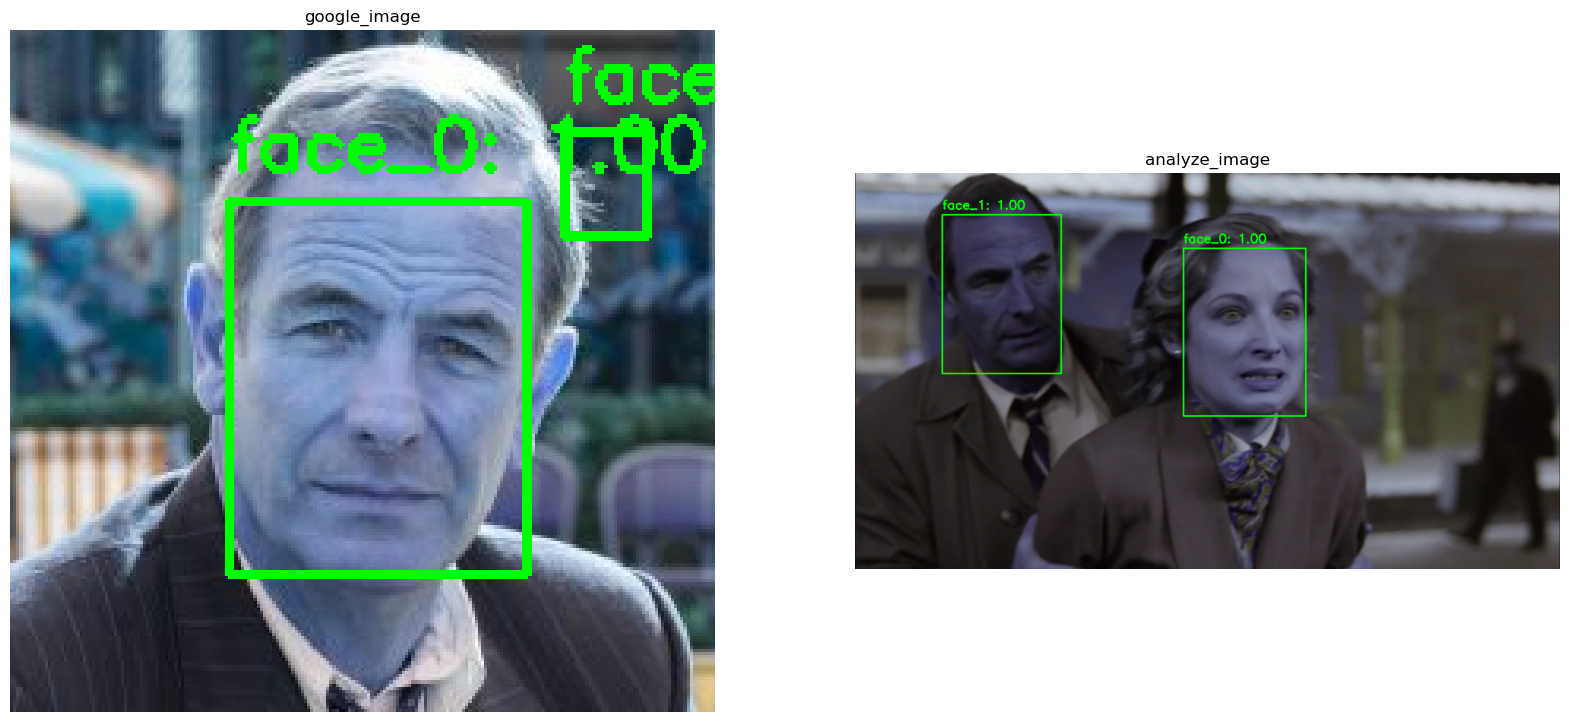

In [8]:
import matplotlib.pyplot as plt 

# show the faces that the model identified along with thier confidence scores 
fig, axes = plt.subplots(1, 2, figsize=(20,20))

labels = ["google_image", "analyze_image"]

for i, boxed_image in enumerate([google_boxed, analyze_boxed]):
    axes[i].imshow(boxed_image)
    axes[i].set_title(labels[i])
    axes[i].axis("off")

plt.show()

In [9]:
from sklearn.metrics.pairwise import cosine_similarity

scores = []

# calculate cosine similarity between the known image and all faces appearing in the image to analyze
for embedding in analyze_embeddings:
    similarity = cosine_similarity(embedding.reshape(1, -1), google_embeddings[0].reshape(1, -1))
    score = similarity[0][0]
    scores.append(score)
    print(f"Cosine similarity: {score}")

Cosine similarity: 0.13008233904838562
Cosine similarity: 0.7356356382369995


Display `google_face` alongside the faces extracted from episode frame

Nice! Were seeing the Google image of Robson Green has a higher cosine similarity with `face_1` (0.78) than `face_0` (0.05)

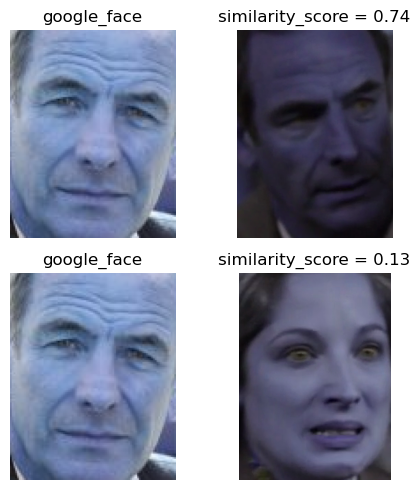

In [10]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(2, 2, figsize=(5, 5))

# plot base image in the first column
axes[0, 0].imshow(google_faces[0])
axes[0, 0].set_title("google_face")
axes[0, 0].axis('off')

axes[1, 0].imshow(google_faces[0])
axes[1, 0].set_title("google_face")
axes[1, 0].axis('off')

# plot rotating images in second coluimn
axes[1, 1].imshow(analyze_faces[0])
axes[1, 1].set_title(f"similarity_score = {scores[0]:.2f}")
axes[1, 1].axis('off')

axes[0, 1].imshow(analyze_faces[1])
axes[0, 1].set_title(f"similarity_score = {scores[1]:.2f}")
axes[0, 1].axis('off')


# supress extra plots
axes[1, 1].axis('off')

plt.tight_layout()
plt.show()